In [ ]:
from keras import losses
from keras.layers import Input, Conv2D, MaxPooling2D, Conv2DTranspose, UpSampling2D
from keras.models import Model
from keras.models import load_model
from keras import callbacks
from keras import optimizers
from keras.datasets import mnist
from sklearn.datasets import fetch_lfw_people
import matplotlib.pyplot as plt
import numpy as np

Mounted at /content/drive


In [ ]:
#load the dataset and adjust its DPI

lfw_people_low_dpi = fetch_lfw_people(min_faces_per_person = 70, resize = 0.26).images
lfw_people_low_dpi = lfw_people_low_dpi.repeat(4, axis = 1).repeat(4, axis = 2)
print(" low_dpi shape =", lfw_people_low_dpi.shape)

#use first 1000 as train set, the rest 288 as test set
x_train_low_dpi = lfw_people_low_dpi[:1000]
x_test_low_dpi = lfw_people_low_dpi[1000:]

# ==============================================================================

lfw_people_high_dpi = fetch_lfw_people(min_faces_per_person = 70, resize = 1.03).images
print("high_dpi shape =", lfw_people_high_dpi.shape)

x_train_high_dpi = lfw_people_high_dpi[:1000]
x_test_high_dpi = lfw_people_high_dpi[1000:]

 low_dpi shape = (1288, 128, 96)
high_dpi shape = (1288, 128, 96)


In [ ]:
# normalize
x_train_low_dpi = x_train_low_dpi.astype('float32') / 255.0
x_test_low_dpi = x_test_low_dpi.astype('float32') / 255.0


x_train_high_dpi = x_train_high_dpi.astype('float32') / 255.0
x_test_high_dpi = x_test_high_dpi.astype('float32') / 255.0

# ======================================================

x_train_low_dpi = np.reshape(x_train_low_dpi, (len(x_train_low_dpi), 128, 96, 1))
print("x_train_low_dpi shape =", x_train_low_dpi.shape)
x_test_low_dpi = np.reshape(x_test_low_dpi, (len(x_test_low_dpi), 128, 96, 1))
print("x_test_low_dpi shape =", x_test_low_dpi.shape)


x_train_high_dpi = np.reshape(x_train_high_dpi, (len(x_train_high_dpi), 128, 96, 1))
print("x_train_high_dpi shape =", x_train_high_dpi.shape)
x_test_high_dpi = np.reshape(x_test_high_dpi, (len(x_test_high_dpi), 128, 96, 1))
print("x_test_high_dpi shape =", x_test_high_dpi.shape)

x_train_low_dpi shape = (1000, 128, 96, 1)
x_test_low_dpi shape = (288, 128, 96, 1)
x_train_high_dpi shape = (1000, 128, 96, 1)
x_test_high_dpi shape = (288, 128, 96, 1)


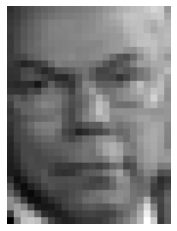

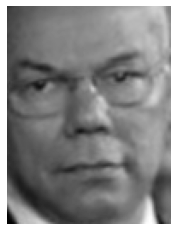

In [ ]:
def show_image(a):
    a = a.T[0]
    a = a.T
    plt.axis("off")
    plt.imshow(a, cmap = "gray")
    plt.show()

show_image(x_train_low_dpi[5])
show_image(x_train_high_dpi[5])

In [ ]:
#setup model
input = Input(shape=(128, 96, 1))
    
# Encoder
x = Conv2D(64, (3, 3), activation = "tanh", padding = "same")(input)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(128, (3, 3), activation = "tanh", padding = "same")(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(256, (3, 3), activation = "tanh", padding = "same")(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(512, (3, 3), activation = "tanh", padding = "same")(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(1024, (3, 3), activation = "tanh", padding = "same")(x)

# Decoder
x = Conv2DTranspose(512, (3, 3), strides = 2, activation = "tanh", padding = "same")(x)
x = Conv2DTranspose(256, (3, 3), strides = 2, activation = "tanh", padding = "same")(x)
x = Conv2DTranspose(128, (3, 3), strides = 2, activation = "tanh", padding = "same")(x)
x = Conv2DTranspose(64, (3, 3), strides = 2, activation = "tanh", padding = "same")(x)
x = Conv2D(1, (3, 3), activation = "sigmoid", padding = "same")(x)

# Autoencoder
autoencoder = Model(input, x)

autoencoder.compile(optimizer = 'adam', loss = losses.mean_squared_error)
autoencoder.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 128, 96, 1)]      0         
                                                                 
 conv2d_12 (Conv2D)          (None, 128, 96, 64)       640       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 64, 48, 64)       0         
 2D)                                                             
                                                                 
 conv2d_13 (Conv2D)          (None, 64, 48, 128)       73856     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 32, 24, 128)      0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 32, 24, 256)       2951

In [ ]:
# train
autoencoder.fit(x_train_low_dpi, x_train_high_dpi,
                epochs = 100,
                batch_size = 64,
                shuffle = True,
                validation_data = (x_test_low_dpi, x_test_high_dpi)
               )


Epoch 1/100
16/16 [==============================] - 14s 887ms/step - loss: 9.3467e-04 - val_loss: 0.0012
Epoch 2/100
16/16 [==============================] - 14s 880ms/step - loss: 9.0338e-04 - val_loss: 0.0012
Epoch 3/100
16/16 [==============================] - 14s 899ms/step - loss: 8.4257e-04 - val_loss: 0.0012
Epoch 4/100
16/16 [==============================] - 14s 883ms/step - loss: 8.3580e-04 - val_loss: 0.0012
Epoch 5/100
16/16 [==============================] - 14s 897ms/step - loss: 8.0696e-04 - val_loss: 0.0012
Epoch 6/100
16/16 [==============================] - 11s 684ms/step - loss: 8.2278e-04 - val_loss: 0.0012
Epoch 7/100
16/16 [==============================] - 11s 686ms/step - loss: 8.2398e-04 - val_loss: 0.0012
Epoch 8/100
16/16 [==============================] - 14s 883ms/step - loss: 8.0021e-04 - val_loss: 0.0012
Epoch 9/100
16/16 [==============================] - 11s 687ms/step - loss: 8.7982e-04 - val_loss: 0.0013
Epoch 10/100
16/16 [==========================

(128, 96, 1)
(128, 96, 1)


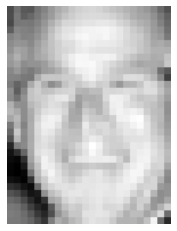

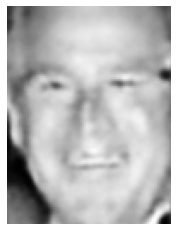

(128, 96, 1)
(128, 96, 1)


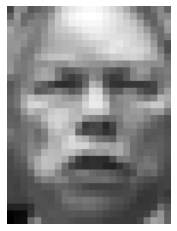

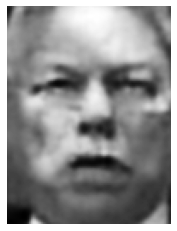

(128, 96, 1)
(128, 96, 1)


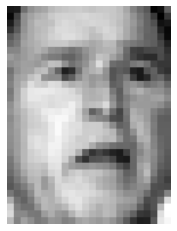

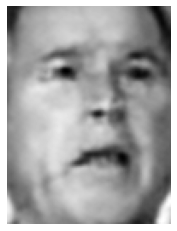

(128, 96, 1)
(128, 96, 1)


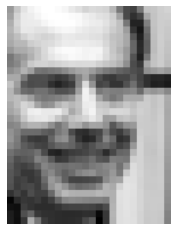

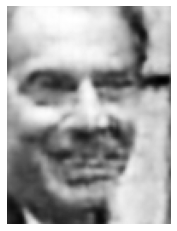

(128, 96, 1)
(128, 96, 1)


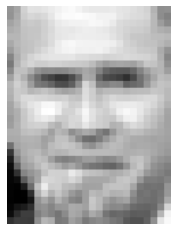

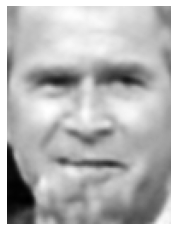

(128, 96, 1)
(128, 96, 1)


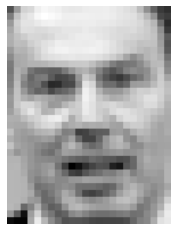

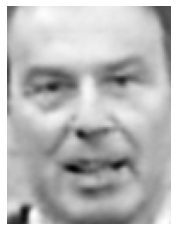

(128, 96, 1)
(128, 96, 1)


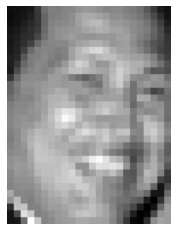

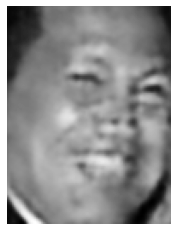

(128, 96, 1)
(128, 96, 1)


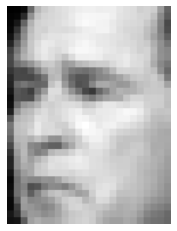

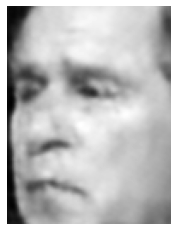

(128, 96, 1)
(128, 96, 1)


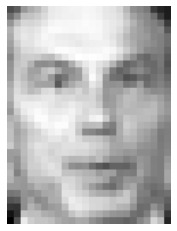

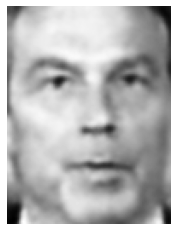

(128, 96, 1)
(128, 96, 1)


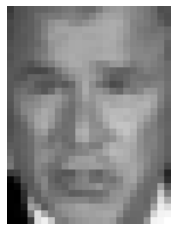

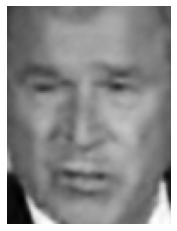

In [ ]:
#show the image and the result
for idx in range(10):
    a = x_test_low_dpi[idx:idx + 1]
    result = autoencoder.predict(a)

    print(a[0].shape)
    print(result[0].shape)

    show_image(a[0])
    show_image(result[0])